# Top skills required for Job

In [1]:
#importing Libraries
import seaborn as sns
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

c:\Users\rchar\anaconda3\envs\pyc\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#load and clean data

#loading of data
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_uk = df[df['job_country'] == 'United Kingdom']

In [6]:
df_skill = df_uk.explode('job_skills')

In [8]:
df_skill[['job_title','job_skills']]

,job_title,job_skills
15,Data Engineer,python
15,Data Engineer,sql
15,Data Engineer,power bi
45,Senior Data Analyst,sql
45,Senior Data Analyst,python
...,...,...
785642,Submission for the position: Data Engineer Sen...,qlik
785642,Submission for the position: Data Engineer Sen...,confluence
785642,Submission for the position: Data Engineer Sen...,jira
785676,Senior Data Scientist,r


In [11]:
df_skill_count = df_skill.groupby(['job_skills','job_title_short']).size()

In [14]:
df_skill_count

job_skills  job_title_short          
airflow     Business Analyst                1
            Cloud Engineer                  6
            Data Analyst                   41
            Data Engineer                1062
            Data Scientist                141
                                         ... 
zoom        Machine Learning Engineer       3
            Senior Data Analyst             2
            Senior Data Engineer            6
            Senior Data Scientist           4
            Software Engineer               1
Length: 1419, dtype: int64

In [15]:
df_skill_count = df_skill_count.reset_index(name= 'skill_count')

In [34]:
df_skill_count.sort_values(by='skill_count', ascending=False , inplace= True)
df_skill_count

,job_skills,job_title_short,skill_count
1163,sql,Data Engineer,7050
915,python,Data Engineer,6462
916,python,Data Scientist,6329
88,azure,Data Engineer,4865
1162,sql,Data Analyst,4467
...,...,...,...
498,ionic,Data Analyst,1
497,ibm cloud,Senior Data Scientist,1
494,huggingface,Data Scientist,1
490,hugging face,Cloud Engineer,1


In [29]:
jt = df_skill_count['job_title_short'].unique().tolist()

jt = jt[:3]

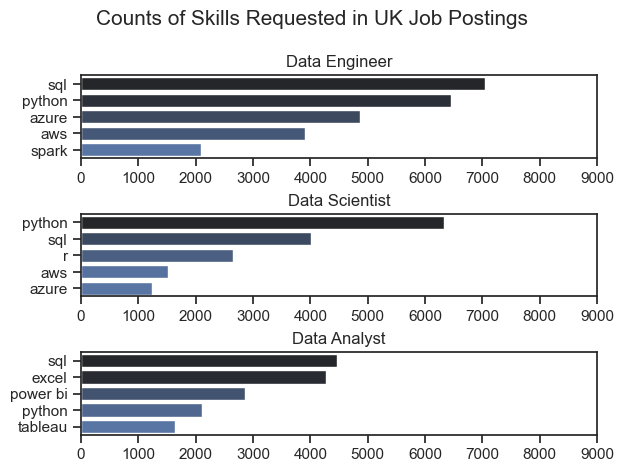

In [33]:
fig, ax = plt.subplots(len(jt), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(jt):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 9000) # make the scales the same

fig.suptitle('Counts of Skills Requested in UK Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [38]:
jtsc = df_uk['job_title_short'].value_counts().reset_index(name='job_total')
jtsc

,job_title_short,job_total
0,Data Engineer,11807
1,Data Analyst,10482
2,Data Scientist,9148
3,Senior Data Engineer,3337
4,Senior Data Scientist,2367
5,Senior Data Analyst,1356
6,Business Analyst,827
7,Software Engineer,541
8,Machine Learning Engineer,317
9,Cloud Engineer,193


In [41]:
df_skill_perc = pd.merge(df_skill_count, jtsc, how='left' , on='job_title_short')
df_skill_perc['skill_percent'] = (df_skill_perc['skill_count']/df_skill_perc['job_total'])*100
df_skill_perc

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,sql,Data Engineer,7050,11807,59.710341
1,python,Data Engineer,6462,11807,54.730245
2,python,Data Scientist,6329,9148,69.184521
3,azure,Data Engineer,4865,11807,41.204370
4,sql,Data Analyst,4467,10482,42.615913
...,...,...,...,...,...
1414,ionic,Data Analyst,1,10482,0.009540
1415,ibm cloud,Senior Data Scientist,1,2367,0.042248
1416,huggingface,Data Scientist,1,9148,0.010931
1417,hugging face,Cloud Engineer,1,193,0.518135


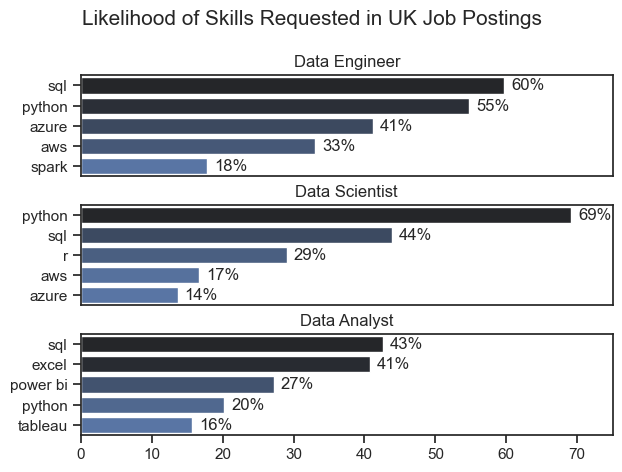

In [46]:
fig, ax = plt.subplots(len(jt), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(jt):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 75)
        # remove the x-axis tick labels for better readability
    if i != len(jt) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
    

fig.suptitle('Likelihood of Skills Requested in UK Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()